In [4]:
import deap
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)
        
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook
     

     

In [5]:
import random
from pandas import read_csv
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
class Zoo:
    
    NUM_FOLDS = 5
    
    def __init__(self, randomSeed):
        
        self.randomSeed = randomSeed
        
        self.data = read_csv('breast-cancer-wisconsin1.data', header = None, usecols=range(1, 11))
        
        self.X = self.data.iloc[:, 0:9]
        self.y = self.data.iloc[:, 9]
        
        self.kfold = model_selection.KFold(n_splits = self.NUM_FOLDS, random_state = self.randomSeed, shuffle=True)
        
        self.classifier = DecisionTreeClassifier(random_state = self.randomSeed)
        
    def __len__(self):
        return self.X.shape[1]
    
    def getMeanAccuracy(self, zeroOneList):
        
        zeroIndices = [i for i, n in enumerate(zeroOneList) if n == 0]
        currentX = self.X.drop(self.X.columns[zeroIndices], axis = 1)
        
        cv_results = model_selection.cross_val_score(self.classifier, currentX, self.y, cv = self.kfold, scoring = 'accuracy')
        
        
        return cv_results.mean()
    
def main():
    zoo = Zoo(randomSeed=42)
    
    allOnes = [1] * len(zoo)
    print("-- Выделены все признаки: ", allOnes, ", верность = ", zoo.getMeanAccuracy(allOnes))
    
if __name__ == "__main__":
    main()

-- Выделены все признаки:  [1, 1, 1, 1, 1, 1, 1, 1, 1] , верность =  0.9398972250770811


C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max     	avg     
0  	50    	0.947357	0.907666
1  	41    	0.947357	0.929996
2  	40    	0.947357	0.935076
3  	43    	0.947928	0.936512
4  	42    	0.947928	0.936709
5  	38    	0.947928	0.938331
6  	43    	0.947928	0.939578
7  	41    	0.947928	0.938041
8  	44    	0.947928	0.941254
9  	44    	0.947928	0.938834
10 	42    	0.947928	0.941636
11 	42    	0.947928	0.941306
12 	41    	0.947928	0.940951
13 	39    	0.947928	0.941995
14 	44    	0.947928	0.937789
15 	44    	0.947928	0.942073
16 	43    	0.947928	0.942669
17 	41    	0.947928	0.945098
18 	42    	0.947928	0.926698
19 	44    	0.947928	0.943858
20 	44    	0.947928	0.943246
21 	38    	0.948367	0.944881
22 	43    	0.948367	0.943604
23 	45    	0.948367	0.944018
24 	41    	0.948367	0.940287
25 	39    	0.948367	0.942326
26 	44    	0.948367	0.943153
27 	43    	0.948367	0.942676
28 	41    	0.948367	0.943424
29 	42    	0.948367	0.943638
30 	45    	0.948367	0.942448
31 	41    	0.948367	0.944635
32 	39    	0.948367	0.944685
33 	41    	0.9

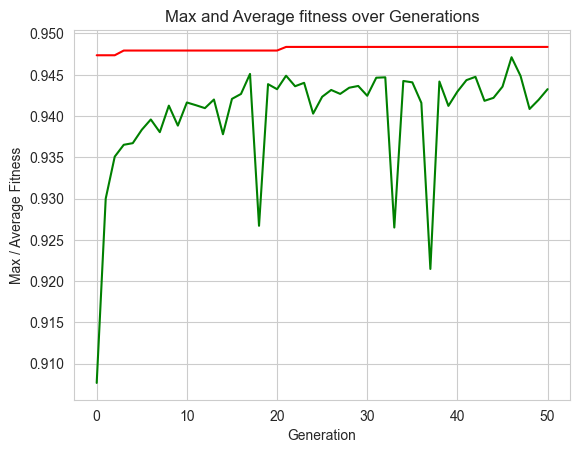

In [8]:
from deap import base
from deap import creator
from deap import tools
import random
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

POPULATION_SIZE = 50
P_CROSSOVER = 0.9 # provability for crossover
P_MUTATION = 0.3 # provability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 5
FEATURE_PENALTY_FACTOR = 0.001
# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the Zoo test class:
zoo = Zoo(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

creator.create("Individual", list, fitness = creator.FitnessMax)

toolbox.register("zeroOrOne", random.randint, 0, 1)

toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(zoo))

toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
def zooClassificationAccuracy(individual):
    numFeaturesUsed = sum(individual)
    if numFeaturesUsed == 0:
        return 0.0,
    else:
        accuracy = zoo.getMeanAccuracy(individual)
        return accuracy - FEATURE_PENALTY_FACTOR * numFeaturesUsed, # return a tuple
    
toolbox.register("evaluate", zooClassificationAccuracy)
# genetic operators:mutFlipBit
toolbox.register("select", tools.selTournament, tournsize = 2)

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutFlipBit, indpb = 1.0 / len(zoo))

def main():
    
    # create initial population (generation 0):
    population = toolbox.populationCreator(n = POPULATION_SIZE)
    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)
    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = eaSimpleWithElitism(population, toolbox, cxpb = P_CROSSOVER, mutpb = P_MUTATION, ngen = MAX_GENERATIONS, stats = stats, halloffame = hof, verbose = True)
    
    # extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # print best solutin found:
    print("- Лучшие решения:")
    for i in range(HALL_OF_FAME_SIZE):
        print(hof.items[i],'hofitems',type(hof.items[i]))
        asd=hof.items[i]
        print(type(numpy.array(hof.items[i],dtype=object)),'asd=',type(asd))
        print(i, ": ", hof.items[i], ", приспособленность = ", hof.items[i].fitness.values[0], ", верность = ", ", признаков = ", sum(hof.items[i]))
        
    print(hof.items)
    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color = "red")
    plt.plot(meanFitnessValues, color = "green")
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average fitness over Generations')
    plt.show()
    
if __name__ == "__main__":
    main()